In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_predict,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [4]:
data=pd.read_csv(r'C:\Users\Bhaskar\winequality-red.csv')

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.shape

(1599, 12)

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

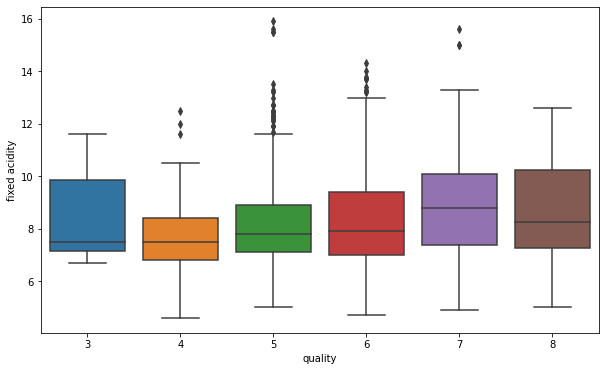

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='quality',y='fixed acidity',data=data)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

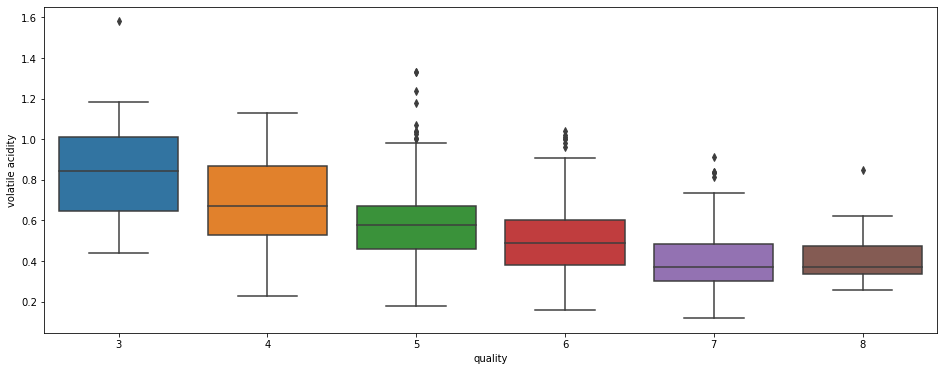

In [14]:
plt.figure(figsize=(16,6))
sns.boxplot(x='quality',y='volatile acidity',data=data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

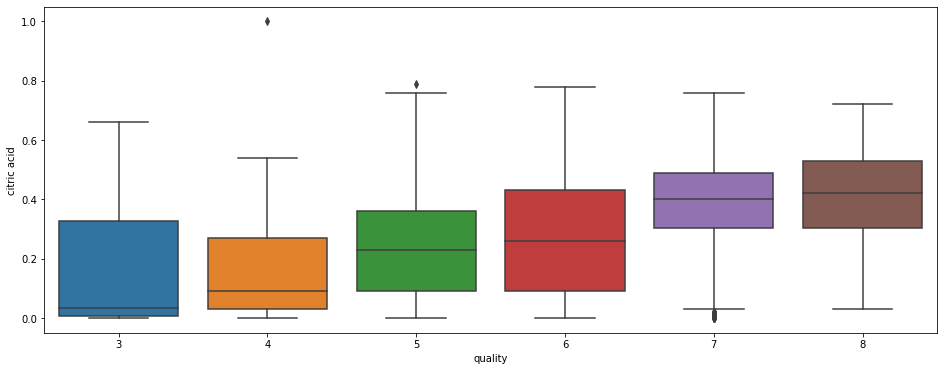

In [15]:
plt.figure(figsize=(16,6))
sns.boxplot(x='quality',y='citric acid',data=data)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

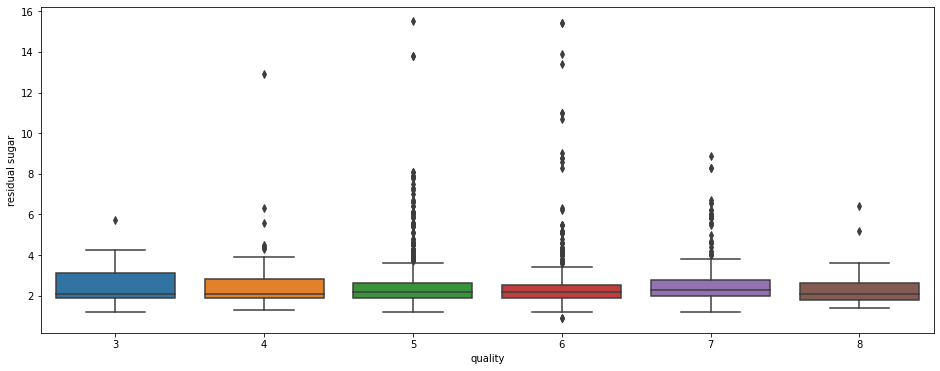

In [16]:
plt.figure(figsize=(16,6))
sns.boxplot(x='quality',y='residual sugar',data=data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

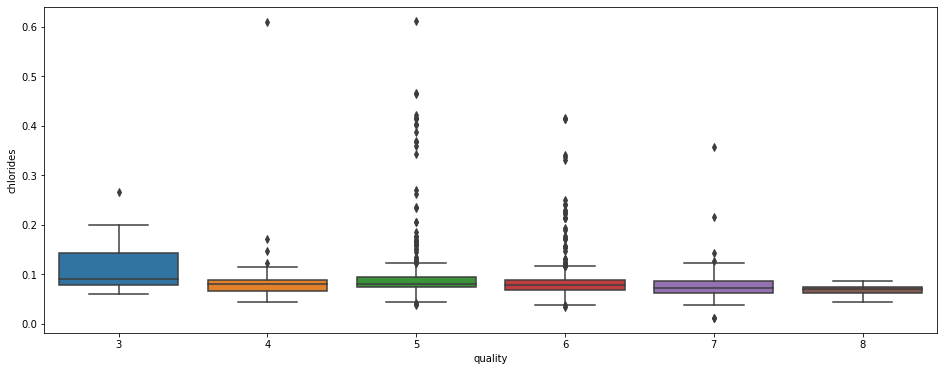

In [17]:
plt.figure(figsize=(16,6))
sns.boxplot(x='quality',y='chlorides',data=data)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

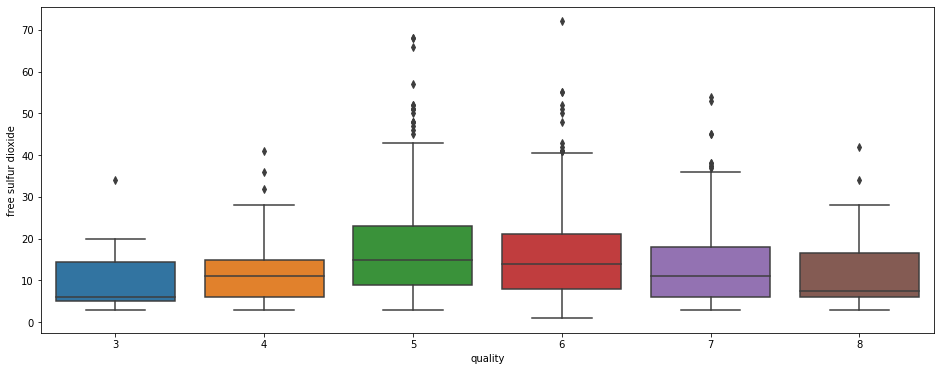

In [18]:
plt.figure(figsize=(16,6))
sns.boxplot(x='quality',y='free sulfur dioxide',data=data)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

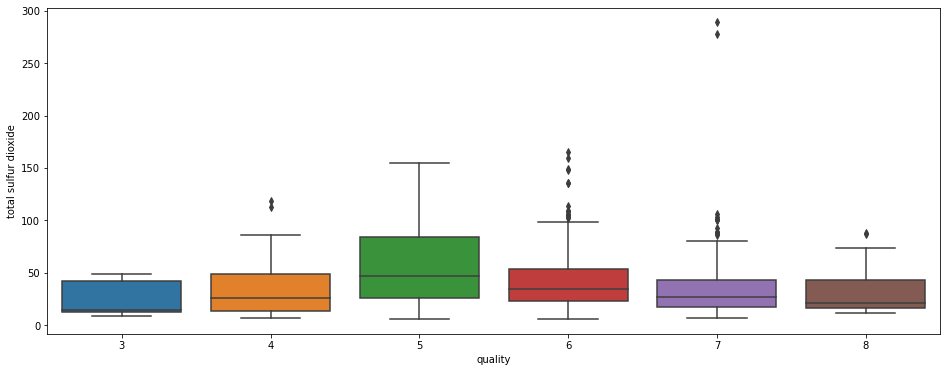

In [19]:
plt.figure(figsize=(16,6))
sns.boxplot(x='quality',y='total sulfur dioxide',data=data)

<AxesSubplot:xlabel='quality', ylabel='density'>

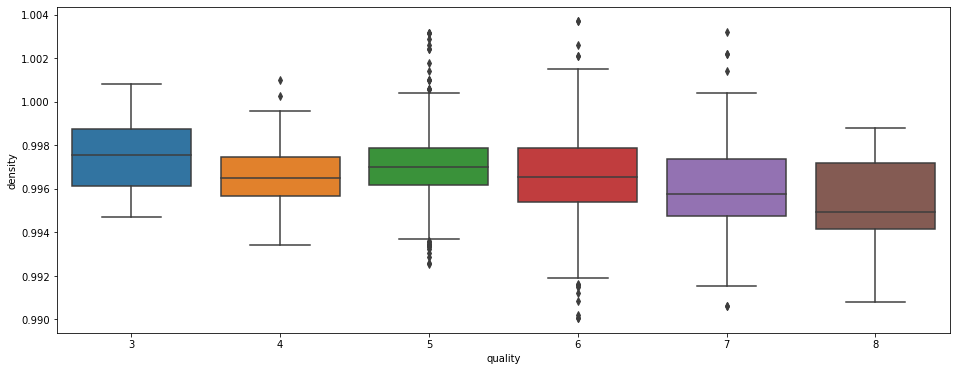

In [20]:
plt.figure(figsize=(16,6))
sns.boxplot(x='quality',y='density',data=data)

<AxesSubplot:xlabel='quality', ylabel='pH'>

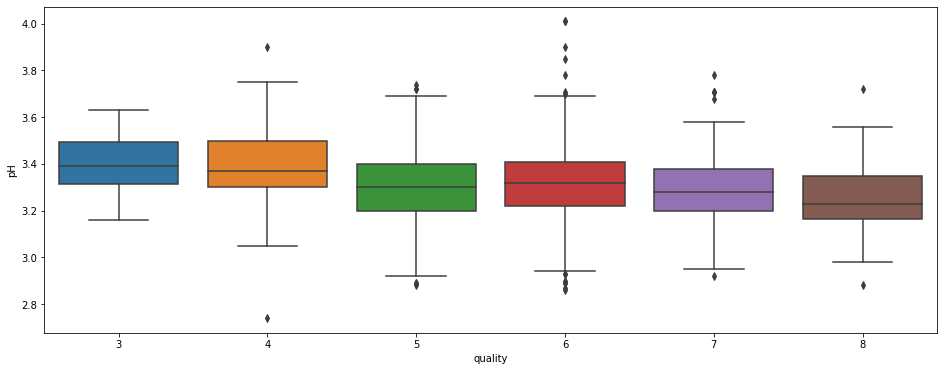

In [21]:
plt.figure(figsize=(16,6))
sns.boxplot(x='quality',y='pH',data=data)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

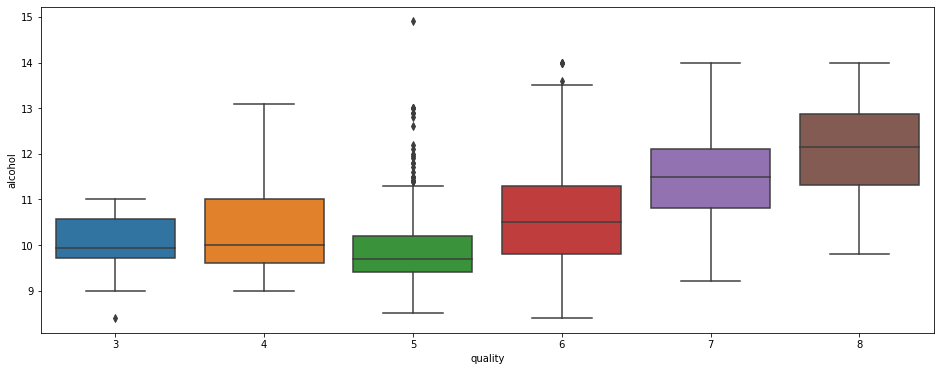

In [22]:
plt.figure(figsize=(16,6))
sns.boxplot(x='quality',y='alcohol',data=data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

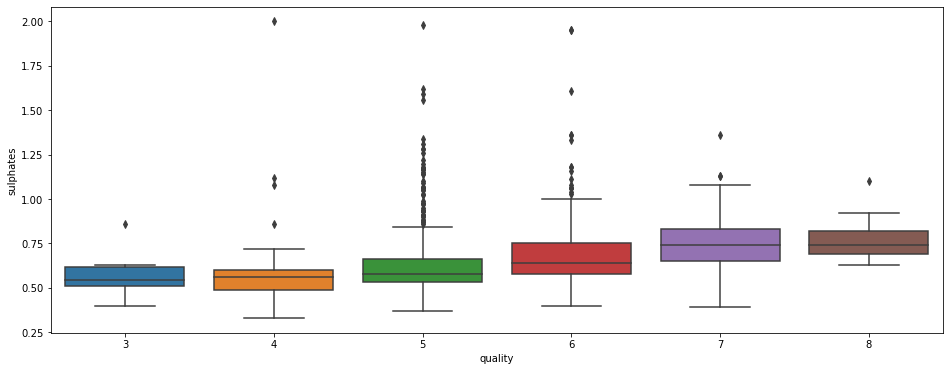

In [23]:
plt.figure(figsize=(16,6))
sns.boxplot(x='quality',y='sulphates',data=data)

In [24]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [25]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [26]:
data['quality']=data['quality'].apply(lambda x:1 if x>6.5 else 0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


C:\Users\Bhaskar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

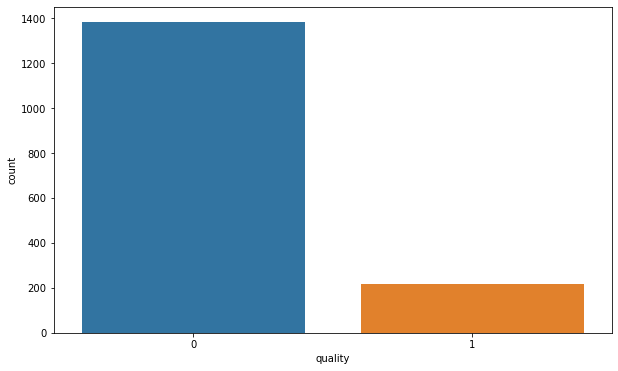

In [28]:
print(data['quality'].value_counts())

plt.figure(figsize=(10,6))
sns.countplot(data.quality)

In [29]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [34]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [36]:
rf_random=RandomForestClassifier(n_estimators=100)
rf_random.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
y_pred=rf_random.predict(x_test)

In [40]:
cm=confusion_matrix(y_test,y_pred)

[[264   9]
 [ 23  24]]


<Figure size 720x0 with 0 Axes>

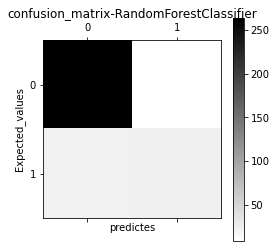

In [44]:
print(cm)
fig=plt.figure(figsize=(10,0))
plt.matshow(cm,cmap=plt.cm.binary,interpolation='nearest')
plt.title('confusion_matrix-RandomForestClassifier')
plt.colorbar()
plt.ylabel('Expected_values')
plt.xlabel('predictes')
plt.show()

In [48]:
print("prediction:",len(y_pred))
print("correct_prediction:",sum(y_pred==y_test))
print("inncorrect_prediction:",sum(y_pred!=y_test))
print('accuracy_score:',sum(y_pred==y_test)*100/len(y_pred))

prediction: 320
correct_prediction: 288
inncorrect_prediction: 32
accuracy_score: 90.0


In [50]:
svm_reg=SVC()

In [51]:
svm_reg.fit(x_train,y_train)

SVC()

In [53]:
y_pre=svm_reg.predict(x_test)

[[273   0]
 [ 46   1]]


<Figure size 720x0 with 0 Axes>

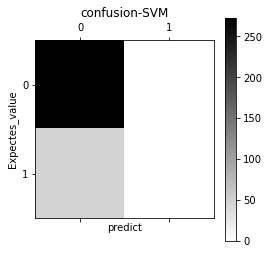

In [54]:
cm=confusion_matrix(y_test,y_pre)
print(cm)

fig=plt.figure(figsize=(10,0))
plt.matshow(cm,cmap=plt.cm.binary,interpolation='nearest')
plt.title('confusion-SVM')
plt.colorbar()
plt.ylabel('Expectes_value')
plt.xlabel('predict')
plt.show()

In [55]:
print("prediction:",len(y_pre))
print("correct_prediction:",sum(y_pre==y_test))
print("inncorrect_prediction:",sum(y_pre!=y_test))
print('accuracy_score:',sum(y_pre==y_test)*100/len(y_pred))

prediction: 320
correct_prediction: 274
inncorrect_prediction: 46
accuracy_score: 85.625
